> # ⚠️ **IMPORTANT: READ BEFORE STARTING THIS LAB**
>
> ### Throughout this lab, you will see **🔧 Try It Yourself**
>
> ✅ You are expected to:
> - Complete each **"🔧 Try It Yourself”** section by writing and running your own code or answering the prompted questions in a markdown or python cell below the section.
>
>
> 🔧 Look for the **wrench emoji** 🔧 — it highlights where you're expected to take action!
>
> ### These sections are **graded** and are **not optional**. Skipping them will impact your lab score.
>
> ---



# IS 4487 Lab 4: Data Understanding

## Outline

- Load and preview a real-world dataset
- Inspect structure and identify missing or unusual data
- Perform basic grouped summaries

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Labs/lab_04_data_understanding.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

If you have any questions about Colab, you can read more here:  
https://research.google.com/colaboratory/faq.html


## Dataset Overview

**Dataset:** `rent.csv`  
Source: [TidyTuesday – 2022-07-05](https://github.com/rfordatascience/tidytuesday/blob/main/data/2022/2022-07-05/rent.csv)

| Variable       | Type       | Description |
|----------------|------------|-------------|
| `post_id`      | Categorical| Unique listing ID |
| `date`         | Numeric    | Listing date (numeric format) |
| `year`         | Integer    | Year of listing |
| `nhood`        | Categorical| Neighborhood |
| `city`         | Categorical| City |
| `county`       | Categorical| County |
| `price`        | Numeric    | Listing price (USD) |
| `beds`         | Numeric    | Number of bedrooms |
| `baths`        | Numeric    | Number of bathrooms |
| `sqft`         | Numeric    | Square footage |
| `room_in_apt`  | Binary     |  Indicates whether the rental listing is for an entire apartment (0) or a single room within an apartment (1). |
| `address`      | Categorical| Street address |
| `lat`          | Numeric    | Latitude |
| `lon`          | Numeric    | Longitude |
| `title`        | Text       | Listing title |
| `descr`        | Text       | Listing description |
| `details`      | Text       | Additional details |


## Part 1: Importing the Data

### Instructions:
- Import the `pandas` library.
- Import data from the rent.csv into a dataframe from the tidytuesday link.
- Use `.info()` and `.head()` to inspect the structure and preview the data.

In [2]:
import pandas as pd

url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2022/2022-07-05/rent.csv'
df = pd.read_csv(url)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200796 entries, 0 to 200795
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   post_id      200796 non-null  object 
 1   date         200796 non-null  int64  
 2   year         200796 non-null  int64  
 3   nhood        200796 non-null  object 
 4   city         200796 non-null  object 
 5   county       199402 non-null  object 
 6   price        200796 non-null  int64  
 7   beds         194188 non-null  float64
 8   baths        42675 non-null   float64
 9   sqft         64679 non-null   float64
 10  room_in_apt  200796 non-null  int64  
 11  address      3908 non-null    object 
 12  lat          7651 non-null    float64
 13  lon          4312 non-null    float64
 14  title        198279 non-null  object 
 15  descr        3254 non-null    object 
 16  details      8016 non-null    object 
dtypes: float64(5), int64(4), object(8)
memory usage: 26.0+ MB


In [3]:
df.head()

,post_id,date,year,nhood,city,county,price,beds,baths,sqft,room_in_apt,address,lat,lon,title,descr,details
0,pre2013_134138,20050111,2005,alameda,alameda,alameda,1250,2.0,2.0,NaN,0,NaN,NaN,NaN,$1250 / 2br - 2BR/2BA 1145 ALAMEDA DE LAS PU...,NaN,NaN
1,pre2013_135669,20050126,2005,alameda,alameda,alameda,1295,2.0,NaN,NaN,0,NaN,NaN,NaN,$1295 / 2br - Walk the Beach! 1 FREE MONTH + $...,NaN,NaN
2,pre2013_127127,20041017,2004,alameda,alameda,alameda,1100,2.0,NaN,NaN,0,NaN,NaN,NaN,$1100 / 2br - cottage,NaN,NaN
3,pre2013_68671,20120601,2012,alameda,alameda,alameda,1425,1.0,NaN,735.0,0,NaN,NaN,NaN,$1425 / 1br - 735ft² - BEST LOCATION SOUTHSHOR...,NaN,NaN
4,pre2013_127580,20041021,2004,alameda,alameda,alameda,890,1.0,NaN,NaN,0,NaN,NaN,NaN,"$890 / 1br - Classy ""Painted Lady"" VICTORIAN -...",NaN,NaN


### 🔧 Try It Yourself – Part 1

1. Add one line of code to print the number of rows and columns.

In [ ]:
# Add code here 🔧

In [4]:
print(df.shape)

(200796, 17)


## Part 2: Inspecting, Cleaning & Removing Outliers

### Instructions:
- Identify missing values.
- Check data types are correct(e.g., dates, numeric columns).
- Check for outliers key numeric variables like `price`, `sqft`, `beds`, or `baths`.

### Think about:
- Are there missing values?
- Do the data types look appropriate?
- Do any numeric variables contain extreme or unusual values?



In [5]:
# Check for missing values
df.isnull().sum()

,0
post_id,0
date,0
year,0
nhood,0
city,0
county,1394
price,0
beds,6608
baths,158121
sqft,136117


In [6]:
# Basic summary statistics
df[['price', 'beds', 'baths', 'sqft']].describe()

,price,beds,baths,sqft
count,200796.000000,194188.000000,42675.000000,64679.000000
mean,2135.362746,1.889025,1.679086,1201.827688
std,1427.747903,1.079138,0.690509,5000.217864
min,220.000000,0.000000,1.000000,80.000000
25%,1295.000000,1.000000,1.000000,750.000000
50%,1800.000000,2.000000,2.000000,1000.000000
75%,2505.000000,3.000000,2.000000,1360.000000
max,40000.000000,12.000000,8.000000,900000.000000


In [7]:
# Check data types
df.dtypes

,0
post_id,object
date,int64
year,int64
nhood,object
city,object
county,object
price,int64
beds,float64
baths,float64
sqft,float64


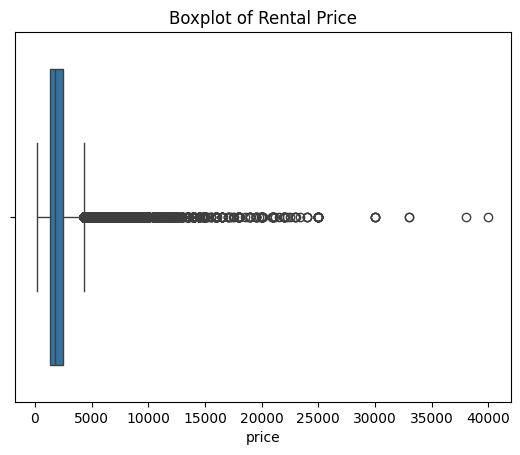

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot of price
sns.boxplot(x=df['price'])
plt.title("Boxplot of Rental Price")
plt.show()

In [9]:
# Remove price outliers (1st–99th percentile)
q_low = df['price'].quantile(0.01)
q_high = df['price'].quantile(0.99)
df = df[(df['price'] >= q_low) & (df['price'] <= q_high)]

### 🔧 Try It Yourself – Part 2

1. Use `.describe()` and a boxplot to check for outliers in **square footage (`sqft`)**.

2. What patterns or issues do you see with square footage values? Is there anything unusual?


In [ ]:
# Add code here 🔧

count     63588.000000
mean       1174.754576
std        5033.363160
min          80.000000
25%         750.000000
50%        1000.000000
75%        1340.000000
max      900000.000000
Name: sqft, dtype: float64


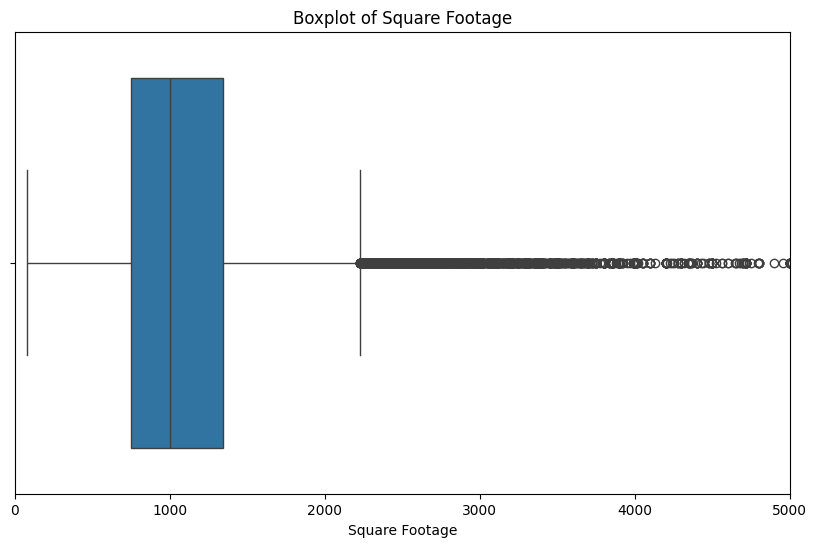

In [10]:
# Use .describe() on sqft
print(df['sqft'].describe())

# Generate a boxplot for sqft
plt.figure(figsize=(10, 6)) # Increase figure size for better readability
sns.boxplot(x=df['sqft'])
plt.title("Boxplot of Square Footage")
plt.xlabel("Square Footage") # Add a label to the x-axis
plt.xlim(0, 5000) # Set x-axis limit to focus on the majority of data

plt.show()

🔧 Add comment here:

The first issue that I see is there are 136117 missing values from the sqft data from an analysis that we did in part 1. There are also a lot of outliers. The maximum number is 90,000 but the 75th percentile of the chart is only 1,310 which is a very substatial difference. Overall, there are a lot of outliers and quite a bit of missing data.

## Part 3: Basic Exploration

Use `groupby` and `value_counts` to summarize trends across neighborhoods and cities.


In [11]:
# Average price by neighborhood
df.groupby('nhood')['price'].mean().sort_values(ascending=False).head(10)

,price
nhood,
inverness,4950.000000
SOMA / south beach,3313.580364
financial district,3237.193893
tiburon / belvedere,3203.396384
saratoga,3136.771513
west portal / forest hills,3046.545455
candlestick point,3011.316239
NOPA,2905.654676
pacific heights,2860.948824


In [11]:
# Top cities by count
df['city'].value_counts().head(10)

,count
city,
san francisco,54264
san jose,13564
oakland,9308
santa rosa,6163
santa cruz,5407
san mateo,5094
sunnyvale,4480
mountain view,4382
santa clara,4132


### 🔧 Try It Yourself – Part 3

Explore the data by performing both of the following:

1. Group the listings by `year` and calculate the average price for each year.
2. Use `.value_counts()` on the `room_in_apt` column to see how common room rentals are.

3. Add a short comment or markdown cell describing any trends or insights you found.


In [ ]:
# Add code here 🔧

In [13]:
# Group by year and calculate the average price
average_price_by_year = df.groupby('year')['price'].mean()
print(average_price_by_year)

year
2000    1601.578947
2001    2005.586351
2002    1687.274368
2003    1578.110312
2004    1639.973280
2005    1514.348082
2006    1751.406450
2007    1996.028583
2008    1964.345241
2009    1843.766169
2010    1784.343396
2011    1992.995094
2012    2027.116023
2013    2441.346597
2014    2585.208608
2015    2756.118535
2016    2727.327913
2017    2842.615219
2018    2783.912647
Name: price, dtype: float64


In [12]:
# Use .value_counts() on room_in_apt and add labels
room_rental_counts = df['room_in_apt'].value_counts().rename(index={0: 'Entire Apartment(0)', 1: 'Room in Apt(1)'})
print(room_rental_counts)

room_in_apt
Entire Apartment(0)    196767
Room in Apt(1)            254
Name: count, dtype: int64


🔧 Add comment here:

In the frist table it showed the average rental price per year. As the years get closer to todays year (2025) it seems like there's a general trend of the average prices going up. With the second table, it seems like it is more common fot people to rent the enitre apartment rather than a room within the apartment. With this data, we can assume that many of the average appartment prices are prices for the entire appartment.

## Export Your Notebook to Submit in Canvas
- Use the instructions from Lab 1

In [14]:
!jupyter nbconvert --to html "lab_04_NagyCassandra.ipynb"

[NbConvertApp] WARNING | pattern 'lab_04_NagyCassandra.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--ex